In [1]:
import os
import sys
import re

import numpy as np
import pandas as pd
import scipy as sp
from scipy import signal

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
sys.path.insert(0, '../src')

from utils import *

In [3]:
sns.set(rc={'figure.figsize':(20,5)})

In [5]:
low_fp = '../data/240p/' 
med_fp = '../data/480p/'
high_fp = '../data/1080p/' 

In [6]:
stdoan_low = pd.read_csv(low_fp + 'stdoan-101-action-240p-20201127.csv')
stdoan_med = pd.read_csv(med_fp + 'stdoan-101-action-480p-20201127.csv')
stdoan_high = pd.read_csv(high_fp + 'stdoan-101-action-1080p-20201127.csv')

In [7]:
mbit_rate = 1/125000

## Summary Stats

There is some promise in using the raw byte value to extract features. We see considerable differences in the average value and interestingly, the standard deviation also increases as the resolution increases. This is most likely due to the fact that the average value increases but the minimum values stay the same and the maximum values increases.

In [18]:
## 240p
stdoan_low[['2->1Bytes', '1->2Bytes', '2->1Pkts', '1->2Pkts']].describe().loc[['mean', 'std']]

,2->1Bytes,1->2Bytes,2->1Pkts,1->2Pkts
mean,55730.487892,4004.881054,42.995014,26.732906
std,188191.951560,9828.295982,140.985946,71.626600


In [19]:
## 480p
stdoan_med[['2->1Bytes', '1->2Bytes', '2->1Pkts', '1->2Pkts']].describe().loc[['mean', 'std']]

,2->1Bytes,1->2Bytes,2->1Pkts,1->2Pkts
mean,106044.399306,6227.412500,80.099306,45.022222
std,376718.729263,18012.916048,280.603017,140.079391


In [20]:
## 1080p
stdoan_high[['2->1Bytes', '1->2Bytes', '2->1Pkts', '1->2Pkts']].describe().loc[['mean', 'std']]

,2->1Bytes,1->2Bytes,2->1Pkts,1->2Pkts
mean,270925.751915,13956.305245,202.629935,105.820860
std,614626.748025,29303.635841,457.364887,228.011091


In [31]:
low_grp = stdoan_low.groupby('Time')[['2->1Bytes']].sum().reset_index()
med_grp = stdoan_med.groupby('Time')[['2->1Bytes']].sum()
high_grp = stdoan_high.groupby('Time')[['2->1Bytes']].sum()

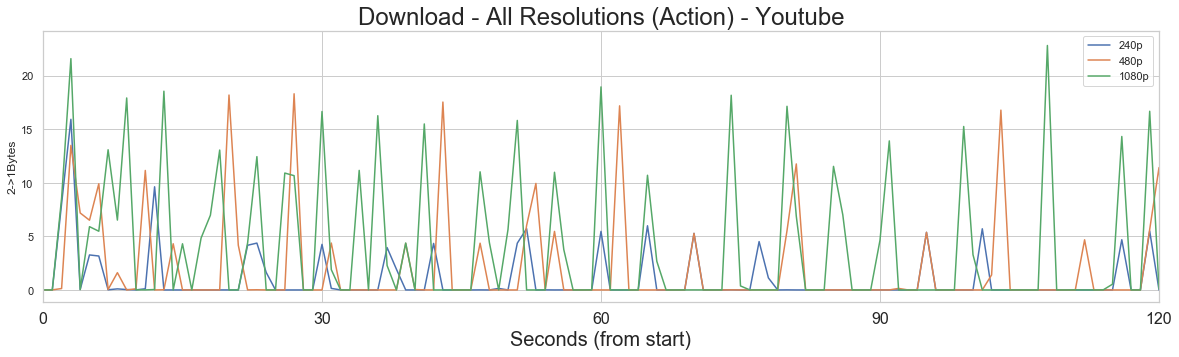

In [56]:
sns.set_style("whitegrid")
sns.despine(offset=10, trim=True);

plt.title('Download - All Resolutions (Action) - Youtube', fontsize=24)

plt.xlim(0, 120)
plt.xlabel('Seconds (from start)', fontsize=20)
plt.xticks([0, 30, 60, 90, 120], fontsize=16)

sns.lineplot(x=np.arange(0, len(low_grp)), y=low_grp['2->1Bytes'] * mbit_rate, label = '240p')
sns.lineplot(x=np.arange(0, len(med_grp)), y=med_grp['2->1Bytes'] * mbit_rate, label = '480p')
sns.lineplot(x=np.arange(0, len(high_grp)), y=high_grp['2->1Bytes'] * mbit_rate, label = '1080p')